**リソースの準備セル**

以下の2つのセルの再生ボタンを押して実行に必要なリソースを準備します。

1つめ：ChatGPTのアクセスキーの設定

2つめ：チャットの表示を行う関数、フォントや画像を準備します。興味のある人は覗いてみてね。

・関数を定義

・JupyterNotebookの作業領域にデータを保存します

In [45]:
OPENAI_SECRET_KEY="ここに共有したシークレットを入れて実行"

In [5]:
!pip install openai
import requests
from PIL import Image, ImageDraw, ImageFont
import textwrap

def create_line_style_screenshot(title, chat_data, output_path="line_screenshot.png", font_path="DotGothic16-Regular.ttf"):
    """
    Create a LINE-style chat screenshot image with individual icons for each chat message.

    Args:
        title (str): The title of the chat.
        chat_data (list): List of chat messages, each with a speaker, icon, time, and text.
        output_path (str): Path to save the generated image.
        font_path (str): Path to the custom font file.
    """
    # Constants
    WIDTH = 900
    PADDING = 20
    AVATAR_SIZE = 80
    BG_COLOR = (240, 240, 240)
    ME_COLOR = (200, 255, 200)
    OTHER_COLOR = (255, 255, 255)
    TEXT_COLOR = (0, 0, 0)
    TITLE_COLOR = (50, 50, 50)
    MAX_LINE_WIDTH = 15  # Maximum characters per line

    # Fonts
    title_font = ImageFont.truetype(font_path, 36)
    name_font = ImageFont.truetype(font_path, 24)
    message_font = ImageFont.truetype(font_path, 28)
    time_font = ImageFont.truetype(font_path, 20)

    # Create a blank image
    img = Image.new("RGB", (WIDTH, 2000), BG_COLOR)
    draw = ImageDraw.Draw(img)

    # Title section
    draw.rectangle([0, 0, WIDTH, 100], fill=(255, 255, 255))
    draw.text((PADDING, 30), title, font=title_font, fill=TITLE_COLOR)

    # Chat section
    y = 120  # Starting height for chat messages
    for chat in chat_data:
        speaker = chat["speaker"]
        time = chat["time"]
        text = chat["text"]

        # Wrap text
        wrapped_text = textwrap.wrap(text, width=MAX_LINE_WIDTH)

        # If speaker is not "me", load the icon image
        if speaker != "me":
            icon_path = chat.get("icon", "no_image.jpg")
            icon = Image.open(icon_path).resize((AVATAR_SIZE, AVATAR_SIZE))
        else:
            icon = None  # No icon for "me"

        # If speaker is not "me", draw the speaker's name
        if speaker != "me":
            draw.text((PADDING + AVATAR_SIZE + 2 * PADDING, y), speaker, font=name_font, fill=TITLE_COLOR)
            y += 30  # Adjust y for name height

        # Calculate box dimensions
        box_width = max(draw.textlength(line, font=message_font) for line in wrapped_text) + 40
        box_height = (len(wrapped_text) * 30) + 20

        if speaker == "me":
            x = WIDTH - box_width - PADDING
            draw.rectangle([x, y, x + box_width, y + box_height], fill=ME_COLOR, outline=None)
            for i, line in enumerate(wrapped_text):
                draw.text((x + 20, y + 10 + i * 30), line, font=message_font, fill=TEXT_COLOR)
        else:
            x = AVATAR_SIZE + 2 * PADDING
            draw.rectangle([x, y, x + box_width, y + box_height], fill=OTHER_COLOR, outline=None)
            for i, line in enumerate(wrapped_text):
                draw.text((x + 20, y + 10 + i * 30), line, font=message_font, fill=TEXT_COLOR)
            if icon:
                img.paste(icon, (PADDING, y - 20))

        # Add timestamp
        time_x = x if speaker == "me" else x + box_width - 75
        draw.text((time_x, y + box_height - 10), time, font=time_font, fill=TITLE_COLOR)

        y += box_height + 60  # Add space for the next message

    # Crop image to content
    img = img.crop((0, 0, WIDTH, y))

    # Save the result
    img.save(output_path)

def download_file(url, output_path):
    """
    Download a file from a specified URL and save it locally.

    Args:
        url (str): The URL of the file to download.
        output_path (str): The path where the file will be saved.
    """
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    try:
        response = requests.get(url, stream=True, headers=headers)
        response.raise_for_status()  # Raise an error if the download fails

        with open(output_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)

    except requests.exceptions.RequestException as e:
        print(f"Failed to download file: {e}")

download_file("https://raw.githubusercontent.com/fontworks-fonts/DotGothic16/14517183ab2f75e8bccafc5a0bff6685d268c687/fonts/ttf/DotGothic16-Regular.ttf", "DotGothic16-Regular.ttf")
download_file("https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj7QEZuxLo_zvFCMKLbMyH5pFU-LihRIeLXMY-QHxEMIgeNOVhvKeSMiNsIxrzNFHMsUv0nxYYl_b5RVqLtJcRgJokPMn8IVpkRDKfnrMr1dsoghyXHGXRakLCV1wX0FBGlltS5W34zMGV4/s400/no_image_square.jpg", "no_image.jpg")
download_file("https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Ishida_Mitsunari.jpg/500px-Ishida_Mitsunari.jpg", "mitsu.jpg")
download_file("https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Kobayakawa_Hideaki_2.jpg/800px-Kobayakawa_Hideaki_2.jpg", "koba.jpg")
download_file("https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Kikkawa_Hiroie.jpg/500px-Kikkawa_Hiroie.jpg", "kikkawa.jpg")
download_file("https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Snowboard%2C_K2_Clicker_step-in_binding.jpg/300px-Snowboard%2C_K2_Clicker_step-in_binding.jpg", "yamada.jpg")
download_file("https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/MTB_Trials_3_Stevage.jpg/440px-MTB_Trials_3_Stevage.jpg", "musya.jpg")

**チャット表示関数の使用例**

チャットを表示する例です。戦国武将の会話を表現してみました。

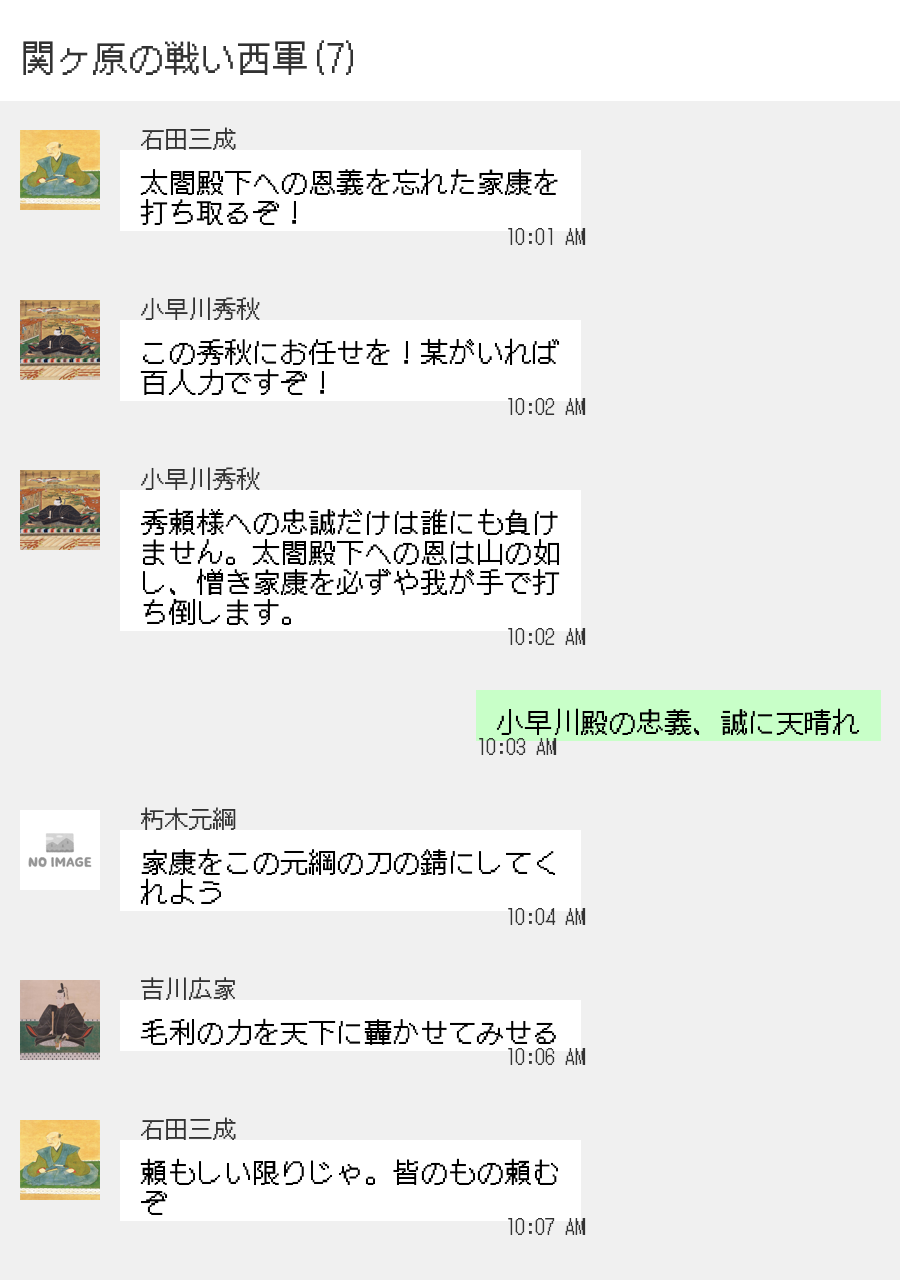

In [6]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as IPImage, display

chat_data_example = [
    {"speaker": "石田三成","icon":"mitsu.jpg", "time": "10:01 AM", "text": "太閤殿下への恩義を忘れた家康を打ち取るぞ！"},
    {"speaker": "小早川秀秋","icon":"koba.jpg", "time": "10:02 AM", "text": "この秀秋にお任せを！某がいれば百人力ですぞ！"},
    {"speaker": "小早川秀秋","icon":"koba.jpg", "time": "10:02 AM", "text": "秀頼様への忠誠だけは誰にも負けません。太閤殿下への恩は山の如し、憎き家康を必ずや我が手で打ち倒します。"},
    {"speaker": "me", "time": "10:03 AM", "text": "小早川殿の忠義、誠に天晴れ"},
    {"speaker": "朽木元綱","time": "10:04 AM", "text": "家康をこの元綱の刀の錆にしてくれよう"},
    {"speaker": "吉川広家","icon":"kikkawa.jpg","time": "10:06 AM", "text": "毛利の力を天下に轟かせてみせる"},
    {"speaker": "石田三成","icon":"mitsu.jpg", "time": "10:07 AM", "text": "頼もしい限りじゃ。皆のもの頼むぞ"},
]

output_path = "line_chat_example.png"
# Generate and display the screenshot with a custom font
create_line_style_screenshot(
    title="関ヶ原の戦い西軍(7)",
    chat_data=chat_data_example,
    output_path=output_path
)
display(IPImage(filename=output_path))


**ChatGPT活用例：しりとりする武将達**

1:ChatGptで会話を作る

In [54]:
# API仕様　https://platform.openai.com/docs/api-reference/chat
from openai import OpenAI

def create_chat(name, previous_chats):
    """ChatGPT APIを使って1つの会話を生成する関数"""
    content = f"""
    あなたは{name}です。武将仲間としりとりをしてください。〜候など昔の言葉を喋ってください。

    以下の条件に従って、会話を考えてください：
    - 会話履歴がない場合はしりとりの主催者としての発言をしてください。しりとりがしたい理由を適当に述べた後に、「り」から始まる単語を述べてください。戦国時代以前にあるものが良いです。ここに該当する場合は発言を終了。
    - 前の人が「ん」以外であれば、前の人が言った単語の末尾から始まる単語を言ってください。戦国時代以前にあるものが良いです。ありきたりな単語禁止。20文字以下でそれに関するエピソードを書いてください。
    - {name}は生成した文章に含める必要はありません。記号等も同様です。
    """
    client = OpenAI(api_key=OPENAI_SECRET_KEY)
    print("gen_kaiwa_single - OpenAI API 呼び出し")
    messages = [{"role": "developer", "content": f"以下の指示に従って会話を生成してください。{content}"}]
    for chat in previous_chats:
      messages.append({"role": "user", "content": chat})
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0.7,
        max_tokens=300,
    )
    print(response)
    return response.choices[0].message.content.strip()

siritori1=create_chat("石田三成",[])
siritori2=create_chat("真田幸村",[siritori1])
siritori3=create_chat("吉川広家",[siritori2])
siritori4=create_chat("石田三成",[siritori3])
siritori5=create_chat("真田幸村",[siritori4])

gen_kaiwa_single - OpenAI API 呼び出し
ChatCompletion(id='chatcmpl-ApdyKmoYnSroEh5brKjsu8oHzjdgi', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='皆の者、しりとりを楽しみたく思う。戦の合間に心を和ませるために、この遊びを提案する次第じゃ。さて、まずは「り」から始まる言葉を挙げるぞ。「りんご」じゃ。さあ、次は「ご」から始まる言葉を頼む！', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1736871744, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_bd83329f63', usage=CompletionUsage(completion_tokens=84, prompt_tokens=255, total_tokens=339, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))
gen_kaiwa_single - OpenAI API 呼び出し
ChatCompletion(id='chatcmpl-ApdyM941heqi6nPHq7Iovv2iCjZB2', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletion

2：チャットを表示する

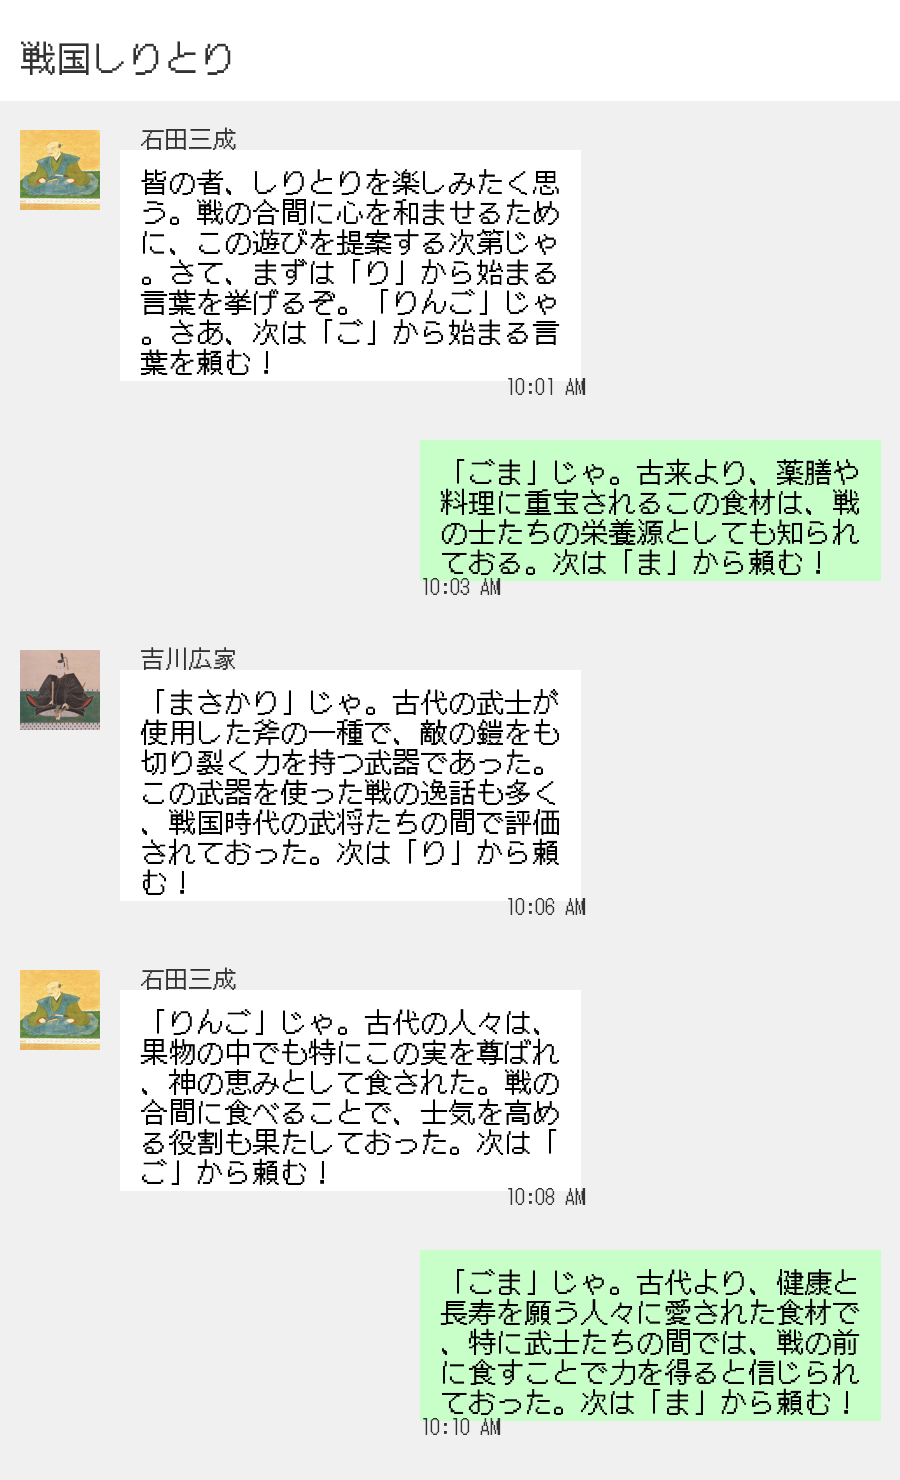

In [55]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as IPImage, display

chat_data_example2 = [
    {"speaker": "石田三成","icon":"mitsu.jpg", "time": "10:01 AM", "text": siritori1},
    {"speaker": "me", "time": "10:03 AM", "text": siritori2},
    {"speaker": "吉川広家","icon":"kikkawa.jpg","time": "10:06 AM", "text": siritori3},
    {"speaker": "石田三成","icon":"mitsu.jpg", "time": "10:08 AM", "text": siritori4},
    {"speaker": "me","icon":"mitsu.jpg", "time": "10:10 AM", "text": siritori5},
]

output_path = "line_chat_example2.png"
# Generate and display the screenshot with a custom font
create_line_style_screenshot(
    title="戦国しりとり",
    chat_data=chat_data_example2,
    output_path=output_path
)
display(IPImage(filename=output_path))

**演習１：ChatGPTのAPIを使ってチャット履歴を作ってみよう（30分）**

お題：「旅行の計画をする数人」

大学の同級生三人は1月に卒業旅行を計画しています。

山田君：冬なので暖かいところに行きたいと考えている

武者小路君：雪山に登って精神修行したい。語尾に「ぞい」をつける

飯田君(あなた)：間をとって、が口癖。口には出さないがどこでもいいと思っている。

以下セルを改造して6つの変数にChatGPTの出力を入れてください。

In [50]:
# API仕様　https://platform.openai.com/docs/api-reference/chat

# 生成AIで以下の6つの会話を作って変数（文字列）に入れてください。
yamada1="山田君の発言1（山田君の希望の行き先を言う）"
musya1="武者小路君の発言1（否定した上で対案を出す）"
me1="あなたの発言1（間をとった行先を提案）"
musya2="武者小路君の発言2（飯田の発言を渋々認める）"
yamada2="山田君の発言2（まだマシかという発言をする）"
me2="あなたの発言2（決まりだね！的な発言をする）"

以下はチャット表示部分。上のセルの改造が終わったら実行しよう。基本的には変更不要。上のセルを実行してから、実行すること。

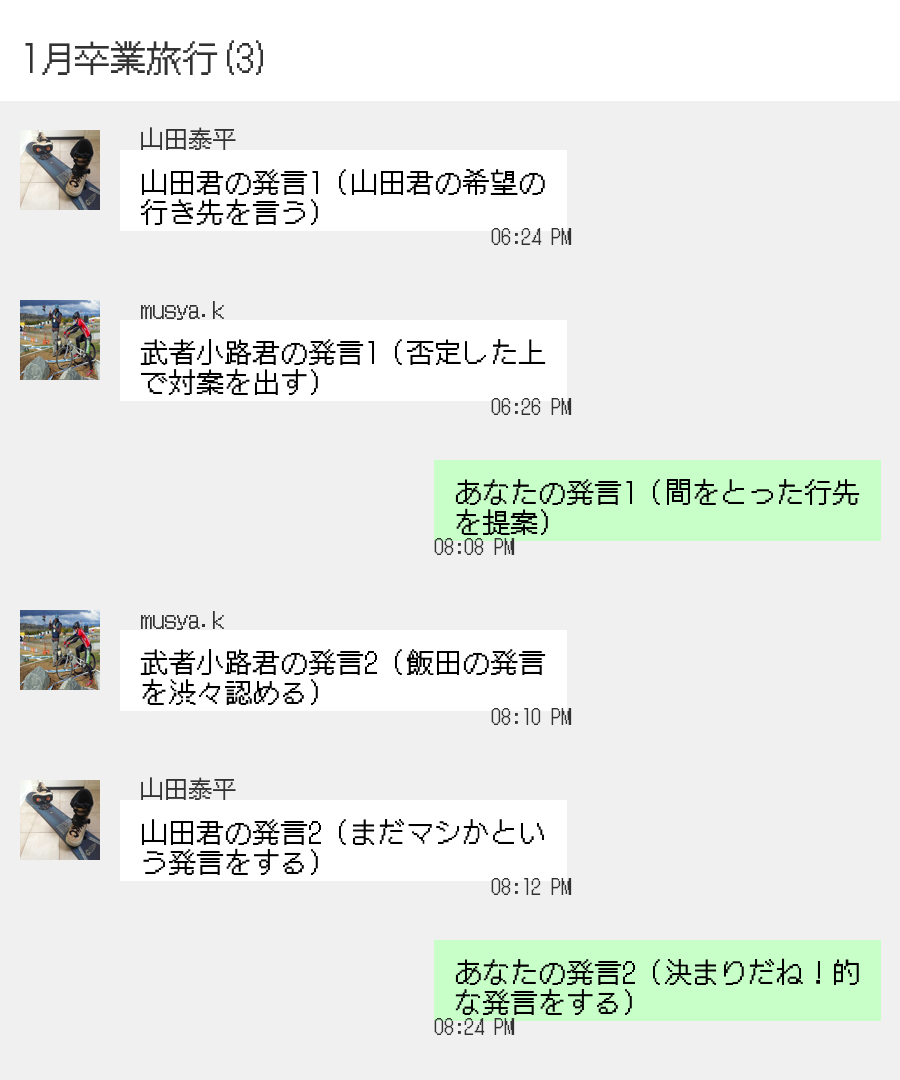

In [51]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as IPImage, display

chat_data_example = [
    {"speaker": "山田泰平","icon":"yamada.jpg", "time": "06:24 PM", "text": yamada1},
    {"speaker": "musya.k","icon":"musya.jpg", "time": "06:26 PM", "text": musya1},
    {"speaker": "me","icon":"koba.jpg", "time": "08:08 PM", "text": me1},
    {"speaker": "musya.k","icon":"musya.jpg", "time": "08:10 PM", "text": musya2},
    {"speaker": "山田泰平","icon":"yamada.jpg", "time": "08:12 PM", "text": yamada2},
    {"speaker": "me","icon":"koba.jpg", "time": "08:24 PM", "text": me2},
]

output_path = "line_chat_example.png"
# Generate and display the screenshot with a custom font
create_line_style_screenshot(
    title="1月卒業旅行(3)",
    chat_data=chat_data_example,
    output_path=output_path
)
display(IPImage(filename=output_path))


**追加課題１〜時間が余ってすることがない人用〜**

戦国しりとりはしりとりとしては欠陥品である。同じ言葉を出してはいけないというルールを追加しよう

ヒント：previous_chatsは複数の会話履歴を追加できる

1:ChatGptで会話を作る（ここを変更）

In [48]:
# ここに問題を修正したしりとりを描く
fix_siritori1="りんご"
fix_siritori2="ごま"
fix_siritori3="まこも湯"
fix_siritori4="ユスティニアヌス"
fix_siritori5="ストロンボリ式噴火"


２：チャットを表示する（変更不要）

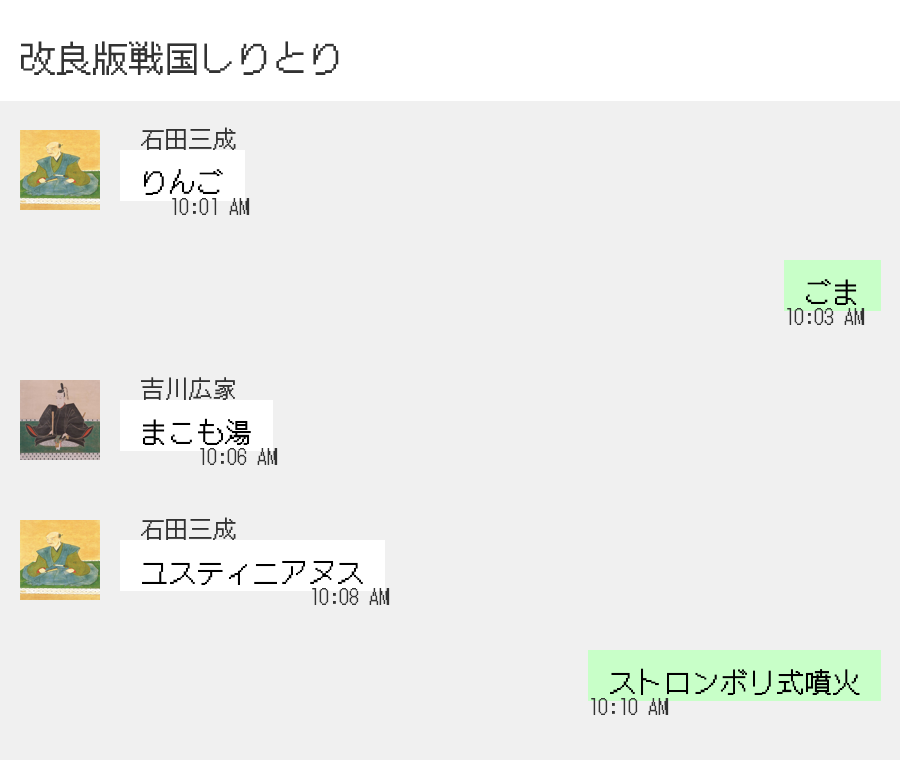

In [56]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as IPImage, display

chat_data_example2 = [
    {"speaker": "石田三成","icon":"mitsu.jpg", "time": "10:01 AM", "text": fix_siritori1},
    {"speaker": "me", "time": "10:03 AM", "text": fix_siritori2},
    {"speaker": "吉川広家","icon":"kikkawa.jpg","time": "10:06 AM", "text": fix_siritori3},
    {"speaker": "石田三成","icon":"mitsu.jpg", "time": "10:08 AM", "text": fix_siritori4},
    {"speaker": "me", "time": "10:10 AM", "text": fix_siritori5},
]

output_path = "line_chat_example2.png"
# Generate and display the screenshot with a custom font
create_line_style_screenshot(
    title="改良版戦国しりとり",
    chat_data=chat_data_example2,
    output_path=output_path
)
display(IPImage(filename=output_path))